# Loading file from previous code

In [1]:
!pip uninstall tensorflow

^C


In [2]:
!pip install keras==3.0.0
!pip install tensorflow
import keras
print(keras.version)

<function version at 0x00000254348782C0>


In [3]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

# Model Building

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Model Training

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 45s 495ms/step - accuracy: 0.5856 - loss: 0.6742 - val_accuracy: 0.7609 - val_loss: 0.4909
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 472ms/step - accuracy: 0.7630 - loss: 0.4877 - val_accuracy: 0.8061 - val_loss: 0.4256
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 49s 572ms/step - accuracy: 0.8370 - loss: 0.3691 - val_accuracy: 0.8382 - val_loss: 0.3874
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 49s 568ms/step - accuracy: 0.8637 - loss: 0.3037 - val_accuracy: 0.8688 - val_loss: 0.3317
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 563ms/step - accuracy: 0.8934 - loss: 0.2612 - val_accuracy: 0.8921 - val_loss: 0.2847


# Graph of loss


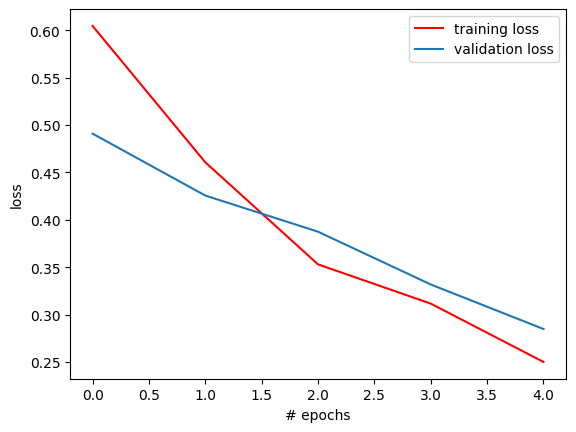

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Graph of Accuracy

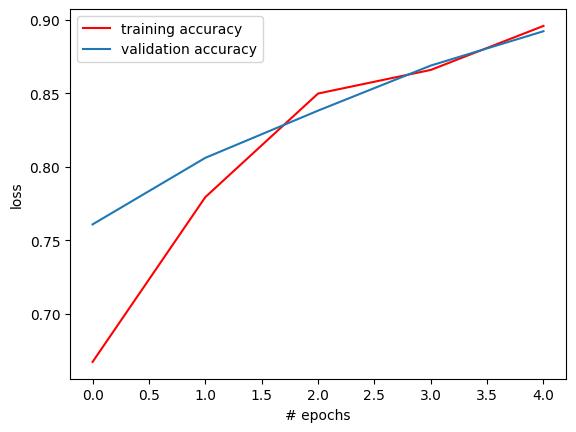

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test Accuracy

In [9]:
!python -m ensurepip --upgrade


Looking in links: c:\Users\Admin\AppData\Local\Temp\tmplao1fwlb


In [10]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [11]:
import os

file_path = 'model-005.keras'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")


File exists


In [12]:
best_model = tf.keras.models.load_model('model-003.keras')
best_model.save('model-003-new.keras')
best_model = tf.keras.models.load_model('model-003-new.keras')


KeyError: 'Unable to synchronously open object (bad object header version number)'

In [ ]:
import h5py
with h5py.File('model-004.keras', 'r') as f:
    for key in f.keys():
        print(key)

In [ ]:
from keras.models import load_model
import tensorflow as tf
# best_model = tf.keras.models.load_model('model-005.keras')
y_pred = best_model.predict(test_data)
accuracy = best_model.evaluate(test_data, test_target)[1]
print('Test Accuracy:', accuracy)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions on test data
predictions = model.predict(test_data)
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert test target to class labels
true_labels = np.argmax(test_target, axis=1)
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(
      np.argmax(model.predict(test_data), axis=1), 
      np.argmax(test_target, axis = 1)
     )
print(cr)

# Model Summary

In [ ]:
model.summary()